# Análise de dados
Esse notebook contém os dados e as respectivas análises somente de um experimento de Lab 1.

O experimentos abordado é:
- Razão carga massa do elétron


Grupo:
- Beatriz,
- Pedro Wong
- Bruno Paiva

Como os dados estão em excel, vamos utilizá-los na forma de csv.

Link para o github com os dados [aqui](https://github.com/binha0/Lab1/tree/main)




In [1]:
# imports iniciais
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

# constantes globais
global h,e,me,alfa,beta
h = 6.626*1e-34 #Js
e = 1.602*1e-19 #C
me = 9.109*1e-31 #kg
eps0 = 8.854*1e-12 #A.s/V
sig_i = 0.01

# Razão carga massa


## Exibição dos dados

In [3]:
df_r5 = pd.read_csv('https://raw.githubusercontent.com/binha0/Lab1/main/Fisica%205%20-%20Raz%C3%A3o%20carga%20massa%20-%20csv%20raio%205%20(1).csv')
df_r4 = pd.read_csv('https://raw.githubusercontent.com/binha0/Lab1/main/Fisica%205%20-%20Raz%C3%A3o%20carga%20massa%20-%20csv%20raio%204%20(1).csv')
df_r3 = pd.read_csv('https://raw.githubusercontent.com/binha0/Lab1/main/Fisica%205%20-%20Raz%C3%A3o%20carga%20massa%20-%20csv%20raio%203.csv')
df_r2 = pd.read_csv('https://raw.githubusercontent.com/binha0/Lab1/main/Fisica%205%20-%20Raz%C3%A3o%20carga%20massa%20-%20csv%20raio%202.csv')

In [4]:
df_r5.columns = ["U", "I", "raio", "e/m (a calcular)"]
df_r4.columns = ["U", "I", "raio", "e/m (a calcular)"]
df_r3.columns = ["U", "I", "raio"]
df_r2.columns = ["U", "I", "raio", "e/m (a calcular)"]

### Raio 5 cm

In [5]:
df_r5 = df_r5[["U", "I", "raio"]]
df_r5

,U,I,raio
0,180,0.89,0.05
1,200,1.15,0.05
2,210,1.20,0.05
3,220,1.24,0.05
4,230,1.29,0.05
5,240,1.30,0.05
6,250,1.33,0.05
7,260,1.39,0.05
8,270,1.42,0.05
9,280,1.45,0.05


### Raio 4 cm

In [6]:
df_r4 = df_r4[["U", "I", "raio"]]
df_r4

,U,I,raio
0,180,1.15,0.04
1,200,1.45,0.04
2,210,1.51,0.04
3,220,1.56,0.04
4,230,1.60,0.04
5,240,1.65,0.04
6,250,1.70,0.04
7,260,1.75,0.04
8,270,1.81,0.04
9,280,1.85,0.04


### Raio 3 cm

In [7]:
df_r3 = df_r3[["U", "I", "raio"]]
df_r3

,U,I,raio
0,148,0.60,0.03
1,180,1.83,0.03
2,200,2.00,0.03
3,210,2.07,0.03
4,220,2.12,0.03
5,230,2.22,0.03
6,240,2.23,0.03
7,250,2.30,0.03
8,260,2.37,0.03
9,270,2.45,0.03


### Raio 2 cm

In [8]:
df_r2 = df_r2[["U", "I", "raio"]]
df_r2

,U,I,raio
0,148,1.54,0.02
1,180,3.04,0.02
2,200,3.33,0.02
3,210,3.40,0.02
4,220,3.48,0.02
5,230,3.56,0.02
6,240,3.63,0.02
7,250,3.62,0.02
8,260,3.71,0.02
9,270,3.80,0.02


In [9]:
# outras constantes necessárias
r_esp = 0.2 # m
n_esp = 154 # numero de espiras
mu_0 = 1.357e-6 # (V.s/A.m)
sig_i = 0.01
sig_b = ((4/5)**(3/2))*mu_0*n_esp*(sig_i/r_esp)
sig_u = 1

### Calculo das incertezas e outros dados

In [10]:
i_r2, i_r3, i_r4, i_r5 = np.array(df_r2["I"]), np.array(df_r3["I"]), np.array(df_r4["I"]), np.array(df_r5["I"])
u_2, u_3, u_4, u_5 = np.array(df_r2["U"]), np.array(df_r3["U"]), np.array(df_r4["U"]), np.array(df_r5["U"])


- Calculando dados dos campos magnéticos para raios de 2cm, 3cm, 4cm, 5cm respectivamente

In [11]:
b_r2, b_r3, b_r4, b_r5 = ((4/5)**(3/2))*mu_0*n_esp*(i_r2/r_esp), ((4/5)**(3/2))*mu_0*n_esp*(i_r3/r_esp), ((4/5)**(3/2))*mu_0*n_esp*(i_r4/r_esp), ((4/5)**(3/2))*mu_0*n_esp*(i_r5/r_esp)
b_r2, b_r3, b_r4, b_r5

(array([0.0011514 , 0.00227289, 0.00248972, 0.00254205, 0.00260187,
        0.00266168, 0.00271401, 0.00270654, 0.00277383, 0.00284112,
        0.00283364, 0.00282616]),
 array([0.0004486 , 0.00136822, 0.00149532, 0.00154766, 0.00158504,
        0.00165981, 0.00166729, 0.00171962, 0.00177196, 0.00183177,
        0.00186916, 0.00189159, 0.00195888, 0.00197383, 0.0020486 ,
        0.0020785 ]),
 array([0.00085981, 0.00108411, 0.00112897, 0.00116635, 0.00119626,
        0.00123364, 0.00127103, 0.00130841, 0.00135327, 0.00138318,
        0.00141308, 0.00142804, 0.00148037, 0.00149532, 0.00154018]),
 array([0.00066542, 0.00085981, 0.00089719, 0.0009271 , 0.00096448,
        0.00097196, 0.00099439, 0.00103925, 0.00106168, 0.00108411,
        0.00112149, 0.00114392, 0.00115888, 0.00118131, 0.00121869]))

- Calculando dados das razões carga massa para raios 2cm, 3cm, 4cm, 5cm respectivamente

In [12]:
raz_r2, raz_r3, raz_r4, raz_r5 = 2*u_2/((b_r2**2)*(0.02**2)), 2*u_3/((b_r3**2)*(0.03**2)), 2*u_4/((b_r4**2)*(0.04**2)), 2*u_5/((b_r5**2)*(0.05**2))
raz_r2, raz_r3, raz_r4, raz_r5

(array([5.58186298e+11, 1.74214475e+11, 1.61324537e+11, 1.62487650e+11,
        1.62488673e+11, 1.62325496e+11, 1.62913431e+11, 1.70640363e+11,
        1.68960204e+11, 1.67245896e+11, 1.74356647e+11, 1.81540403e+11]),
 array([1.63431435e+12, 2.13671552e+11, 1.98767962e+11, 1.94829620e+11,
        1.94593056e+11, 1.85523217e+11, 1.91857109e+11, 1.87871419e+11,
        1.84014919e+11, 1.78816658e+11, 1.78096094e+11, 1.80108137e+11,
        1.73738094e+11, 1.76819525e+11, 1.69443624e+11, 1.71289610e+11]),
 array([3.04351699e+11, 2.12712444e+11, 2.05951190e+11, 2.02149369e+11,
        2.00903164e+11, 1.97125251e+11, 1.93437679e+11, 1.89843686e+11,
        1.84291592e+11, 1.82942025e+11, 1.81540403e+11, 1.83888016e+11,
        1.76819525e+11, 1.78891165e+11, 1.75472353e+11]),
 array([3.25215602e+11, 2.16427875e+11, 2.08706360e+11, 2.04766162e+11,
        1.97800459e+11, 2.03237300e+11, 2.02262610e+11, 1.92585075e+11,
        1.91631084e+11, 1.90590350e+11, 1.84456668e+11, 1.83407577e+11,
  

- Calculando os dados dos $σ_{e/m_0}$ para raios 2cm, 3cm, 4cm, 5cm respectivamente

In [13]:
sig_raz_r2, sig_raz_r3, sig_raz_r4, sig_raz_r5 =raz_r2*((sig_u/u_2)**2 + (sig_b/b_r2)**2)**(1/2), raz_r3*((sig_u/u_3)**2 + (sig_b/b_r3)**2)**(1/2), raz_r4*((sig_u/u_4)**2 + (sig_b/b_r4)**2)**(1/2), raz_r5*((sig_u/u_5)**2 + (sig_b/b_r5)**2)**(1/2)
sig_raz_r2, sig_raz_r3, sig_raz_r4, sig_raz_r5

(array([5.23087541e+09, 1.12479474e+09, 9.40924956e+08, 9.09441157e+08,
        8.73798191e+08, 8.40244332e+08, 8.13754617e+08, 8.29512705e+08,
        7.93540743e+08, 7.59867677e+08, 7.74208357e+08, 7.89007480e+08]),
 array([2.93918402e+10, 1.66505878e+09, 1.40550174e+09, 1.32159272e+09,
        1.27471178e+09, 1.16147243e+09, 1.17441160e+09, 1.10993048e+09,
        1.05059972e+09, 9.85556351e+08, 9.55018644e+08, 9.44725289e+08,
        8.80408712e+08, 8.79734499e+08, 8.14131403e+08, 8.02639717e+08]),
 array([3.14055804e+09, 1.81196078e+09, 1.67990363e+09, 1.58854608e+09,
        1.52958560e+09, 1.44980305e+09, 1.37602156e+09, 1.30766283e+09,
        1.22580261e+09, 1.18522587e+09, 1.14651559e+09, 1.14133057e+09,
        1.05964076e+09, 1.05478492e+09, 1.00162172e+09]),
 array([4.07637855e+09, 2.17091687e+09, 2.00314817e+09, 1.89558151e+09,
        1.75804592e+09, 1.77798036e+09, 1.72258776e+09, 1.57107471e+09,
        1.52477129e+09, 1.48020775e+09, 1.38447050e+09, 1.34563833e+09,
  

## Tabelas com os dados calculados

### Raio 5cm

In [14]:
df_r5["e/m (a calcular)"] = raz_r5
df_r5[r"sigma e/m"] = sig_raz_r5
df_r5

,U,I,raio,e/m (a calcular),sigma e/m
0,180,0.89,0.05,3.252156e+11,4.076379e+09
1,200,1.15,0.05,2.164279e+11,2.170917e+09
2,210,1.20,0.05,2.087064e+11,2.003148e+09
3,220,1.24,0.05,2.047662e+11,1.895582e+09
4,230,1.29,0.05,1.978005e+11,1.758046e+09
5,240,1.30,0.05,2.032373e+11,1.777980e+09
6,250,1.33,0.05,2.022626e+11,1.722588e+09
7,260,1.39,0.05,1.925851e+11,1.571075e+09
8,270,1.42,0.05,1.916311e+11,1.524771e+09
9,280,1.45,0.05,1.905903e+11,1.480208e+09


### Raio 4cm

In [15]:
df_r4["e/m (a calcular)"] = raz_r4
df_r4[r"sigma e/m"] = sig_raz_r4
df_r4

,U,I,raio,e/m (a calcular),sigma e/m
0,180,1.15,0.04,3.043517e+11,3.140558e+09
1,200,1.45,0.04,2.127124e+11,1.811961e+09
2,210,1.51,0.04,2.059512e+11,1.679904e+09
3,220,1.56,0.04,2.021494e+11,1.588546e+09
4,230,1.60,0.04,2.009032e+11,1.529586e+09
5,240,1.65,0.04,1.971253e+11,1.449803e+09
6,250,1.70,0.04,1.934377e+11,1.376022e+09
7,260,1.75,0.04,1.898437e+11,1.307663e+09
8,270,1.81,0.04,1.842916e+11,1.225803e+09
9,280,1.85,0.04,1.829420e+11,1.185226e+09


### Raio 3cm

In [16]:
df_r3["e/m (a calcular)"] = raz_r3
df_r3[r"sigma e/m"] = sig_raz_r3
df_r3

,U,I,raio,e/m (a calcular),sigma e/m
0,148,0.60,0.03,1.634314e+12,2.939184e+10
1,180,1.83,0.03,2.136716e+11,1.665059e+09
2,200,2.00,0.03,1.987680e+11,1.405502e+09
3,210,2.07,0.03,1.948296e+11,1.321593e+09
4,220,2.12,0.03,1.945931e+11,1.274712e+09
5,230,2.22,0.03,1.855232e+11,1.161472e+09
6,240,2.23,0.03,1.918571e+11,1.174412e+09
7,250,2.30,0.03,1.878714e+11,1.109930e+09
8,260,2.37,0.03,1.840149e+11,1.050600e+09
9,270,2.45,0.03,1.788167e+11,9.855564e+08


### Raio 2cm

In [17]:
df_r2["e/m (a calcular)"] = raz_r2
df_r2[r"sigma e/m"] = sig_raz_r2
df_r2

,U,I,raio,e/m (a calcular),sigma e/m
0,148,1.54,0.02,5.581863e+11,5.230875e+09
1,180,3.04,0.02,1.742145e+11,1.124795e+09
2,200,3.33,0.02,1.613245e+11,9.409250e+08
3,210,3.40,0.02,1.624877e+11,9.094412e+08
4,220,3.48,0.02,1.624887e+11,8.737982e+08
5,230,3.56,0.02,1.623255e+11,8.402443e+08
6,240,3.63,0.02,1.629134e+11,8.137546e+08
7,250,3.62,0.02,1.706404e+11,8.295127e+08
8,260,3.71,0.02,1.689602e+11,7.935407e+08
9,270,3.80,0.02,1.672459e+11,7.598677e+08


- Para fazermos as análises, iremos plotar $2U \mbox{x}(Br)^2$. Então iremos montar as tabelas com os dados necessários:

In [18]:
datas = []
us = [u_2, u_3, u_4, u_5]
bs = [b_r2, b_r3, b_r4,b_r5]
columns = ["U", "sigma U", "(Br)*(Br)", "sigma (Br)*(Br)"]
for p,u in enumerate(us):
  lines = []
  for n,item in enumerate(u):
    lines_1 = []
    lines_1.append(item)
    lines_1.append(sig_u)
    lines_1.append(((bs[p][n]*(p+2))**2)*1e-4)
    lines_1.append(2*bs[p][n]*((p+2)**2)*1e-4*sig_u)
    lines.append(lines_1)
  datas.append(lines)
data_r2, data_r3, data_r4, data_r5 = datas[0], datas[1], datas[2], datas[3]



- Ajuste linear dos dados:

### Raio r=5cm

In [19]:
df_analis_r5 = pd.DataFrame(data_r5, columns=columns)
df_analis_r5

,U,sigma U,(Br)*(Br),sigma (Br)*(Br)
0,180,1,1.106958e-09,0.000003
1,200,1,1.848191e-09,0.000004
2,210,1,2.012397e-09,0.000004
3,220,1,2.148793e-09,0.000005
4,230,1,2.325576e-09,0.000005
5,240,1,2.361771e-09,0.000005
6,250,1,2.472034e-09,0.000005
7,260,1,2.700105e-09,0.000005
8,270,1,2.817914e-09,0.000005
9,280,1,2.938239e-09,0.000005


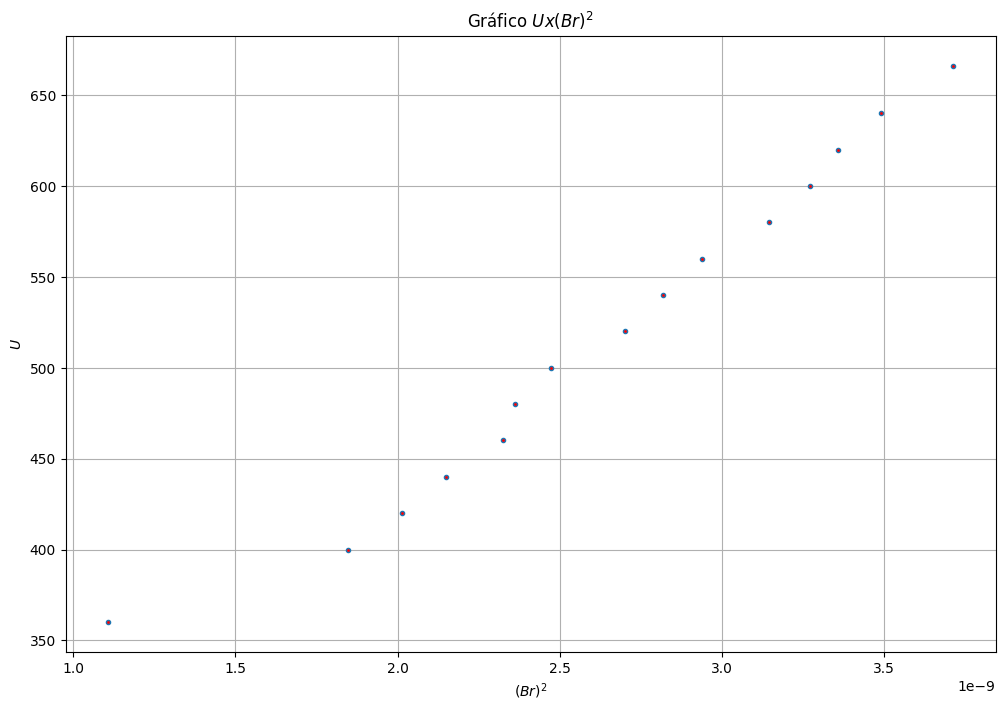

In [20]:
plt.figure(figsize =(12,8))
plt.errorbar(df_analis_r5["(Br)*(Br)"], 2*df_analis_r5["U"], df_analis_r5["sigma U"], fmt = ".", markerfacecolor = "red")
plt.grid()
plt.xlabel(r"$(Br)^2$")
plt.ylabel(r"$U$")
plt.title(r"Gráfico $U x (Br)^2$");

In [21]:
# regressão sem intercepto
modelo = sm.OLS(list(2*df_analis_r5["U"])[1:],sm.add_constant(list(df_analis_r5["(Br)*(Br)"]))[1:])
reg = modelo.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3161.
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           6.61e-16
Time:                        13:28:19   Log-Likelihood:                -42.400
No. Observations:                  14   AIC:                             88.80
Df Residuals:                      12   BIC:                             90.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.9427      7.216     18.425      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [22]:
c_5 = 132.9427
a_5 = 1.442e+11
xs_5 = np.linspace(list(df_analis_r5["(Br)*(Br)"])[0],list(df_analis_r5["(Br)*(Br)"])[-1])
ys_5 = a_5*xs_5 + c_5

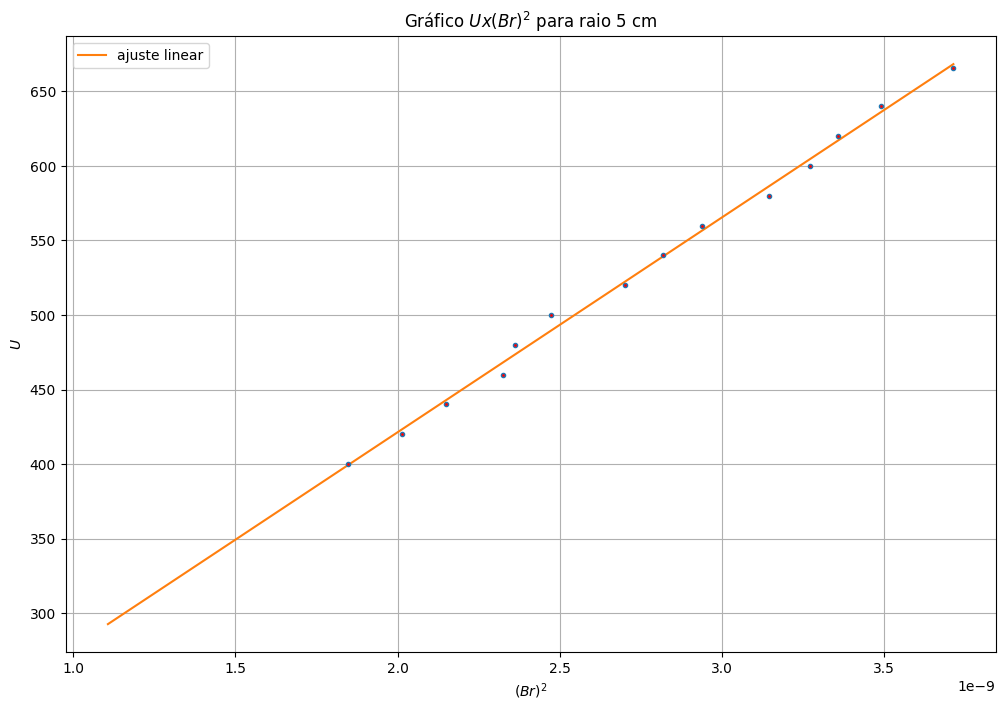

In [23]:
plt.figure(figsize =(12,8))
plt.errorbar(list(df_analis_r5["(Br)*(Br)"])[1:], list(2*df_analis_r5["U"])[1:], list(df_analis_r5["sigma U"])[1:], fmt = ".", markerfacecolor = "red")
plt.grid()
plt.xlabel(r"$(Br)^2$")
plt.ylabel(r"$U$")
plt.title(r"Gráfico $U x (Br)^2$ para raio 5 cm")
plt.plot(xs_5,ys_5, label ="ajuste linear" )
plt.legend();

### Raio r=4cm

In [24]:
df_analis_r4 = pd.DataFrame(data_r4, columns=columns)
df_analis_r4

,U,sigma U,(Br)*(Br),sigma (Br)*(Br)
0,180,1,1.182842e-09,0.000003
1,200,1,1.880473e-09,0.000003
2,210,1,2.039318e-09,0.000004
3,220,1,2.176608e-09,0.000004
4,230,1,2.289660e-09,0.000004
5,240,1,2.435000e-09,0.000004
6,250,1,2.584812e-09,0.000004
7,260,1,2.739096e-09,0.000004
8,270,1,2.930139e-09,0.000004
9,280,1,3.061079e-09,0.000004


Text(0.5, 1.0, 'Gráfico $U x (Br)^2$ - raio 4cm')

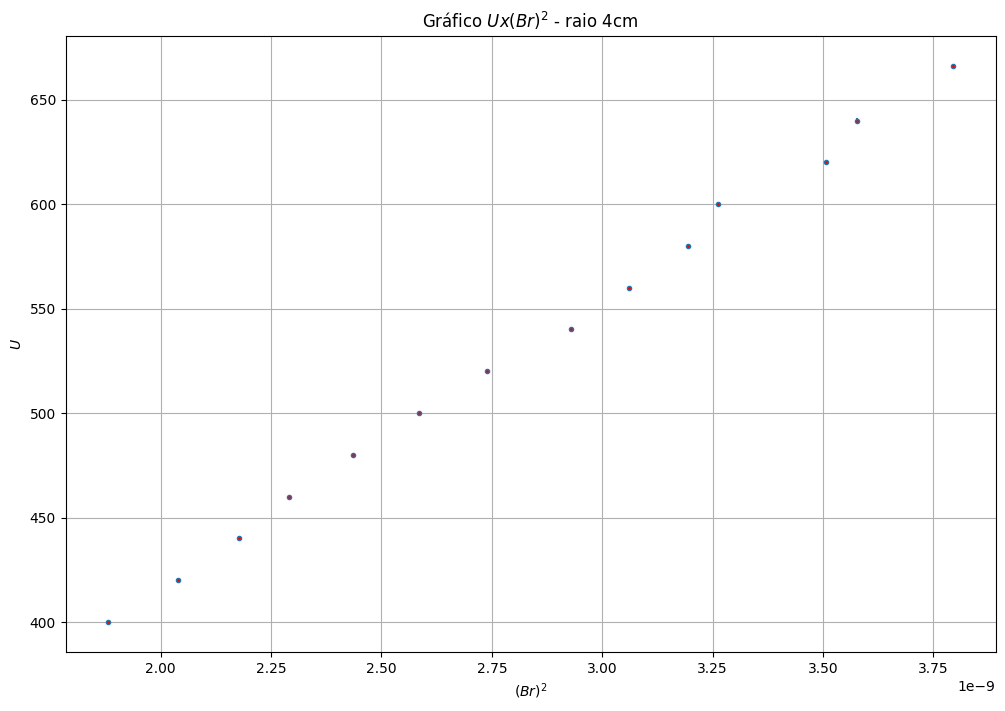

In [25]:
plt.figure(figsize =(12,8))
plt.errorbar(list(df_analis_r4["(Br)*(Br)"])[1:], list(2*df_analis_r4["U"])[1:], list(df_analis_r4["sigma U"])[1:], fmt = ".", markerfacecolor = "red")
plt.grid()
plt.xlabel(r"$(Br)^2$")
plt.ylabel(r"$U$")
plt.title(r"Gráfico $U x (Br)^2$ - raio 4cm")

In [26]:
# regressão sem intercepto
modelo = sm.OLS(list(2*df_analis_r4["U"])[1:],sm.add_constant(list(df_analis_r4["(Br)*(Br)"]))[1:])
reg = modelo.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     5495.
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           2.42e-17
Time:                        13:28:28   Log-Likelihood:                -38.542
No. Observations:                  14   AIC:                             81.08
Df Residuals:                      12   BIC:                             82.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        139.2938      5.389     25.847      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [27]:
c_4 = 139.2938
a_4 = 1.387e+11
xs_4 = np.linspace(list(df_analis_r4["(Br)*(Br)"])[1],list(df_analis_r4["(Br)*(Br)"])[-1])
ys_4 = a_4*xs_4 + c_4

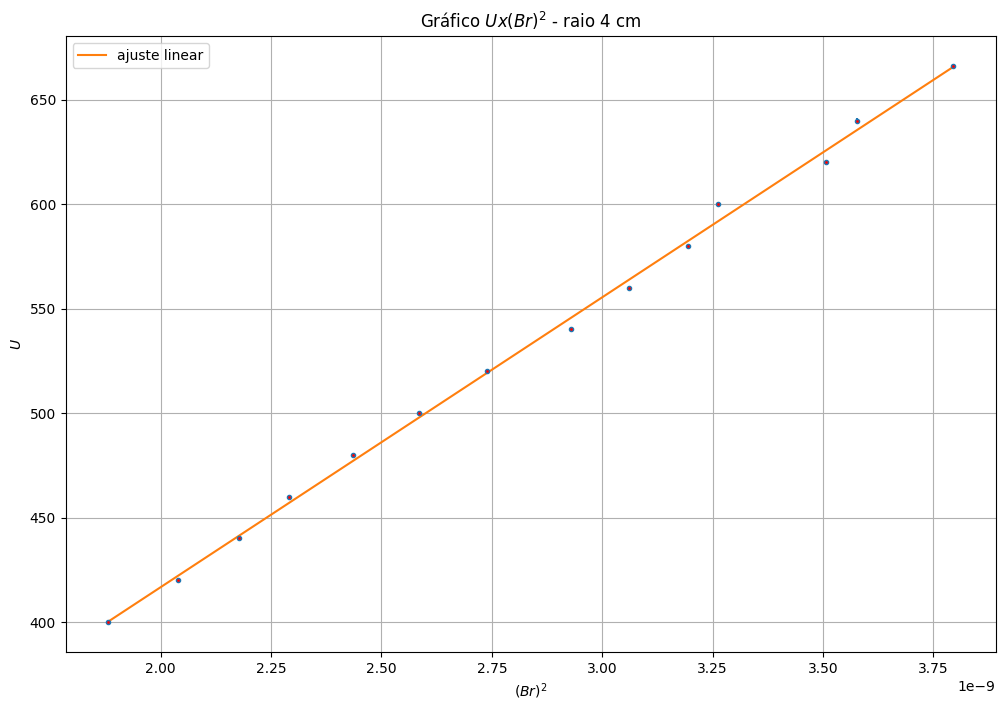

In [28]:
plt.figure(figsize =(12,8))
plt.errorbar(list(df_analis_r4["(Br)*(Br)"])[1:], list(2*df_analis_r4["U"])[1:], list(df_analis_r4["sigma U"])[1:], fmt = ".", markerfacecolor = "red")
plt.grid()
plt.xlabel(r"$(Br)^2$")
plt.ylabel(r"$U$")
plt.title(r"Gráfico $U x (Br)^2$ - raio 4 cm")
plt.plot(xs_4,ys_4, label ="ajuste linear" )
plt.legend();

### Raio r=3cm

In [29]:
df_analis_r3 = pd.DataFrame(data_r3, columns=columns)
df_analis_r3

,U,sigma U,(Br)*(Br),sigma (Br)*(Br)
0,148,1,1.811157e-10,8.074754e-07
1,180,1,1.684829e-09,2.462800e-06
2,200,1,2.012397e-09,2.691585e-06
3,210,1,2.155730e-09,2.785790e-06
4,220,1,2.261129e-09,2.853080e-06
5,230,1,2.479474e-09,2.987659e-06
6,240,1,2.501862e-09,3.001117e-06
7,250,1,2.661395e-09,3.095322e-06
8,260,1,2.825858e-09,3.189528e-06
9,270,1,3.019853e-09,3.297191e-06


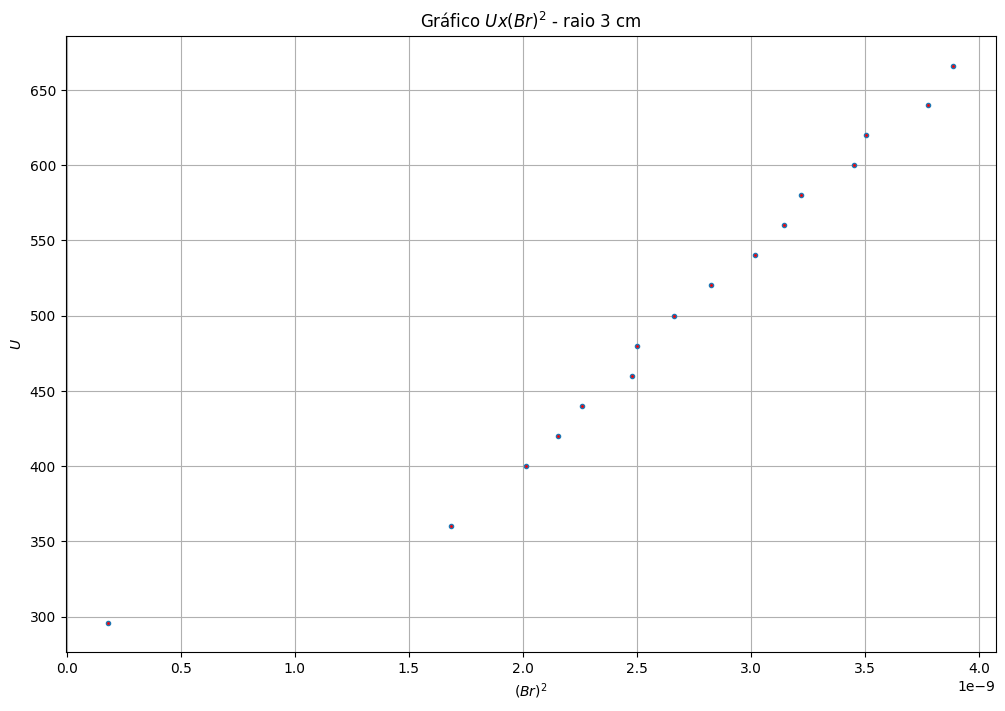

In [30]:
plt.figure(figsize =(12,8))
plt.errorbar(df_analis_r3["(Br)*(Br)"], 2*df_analis_r3["U"], df_analis_r3["sigma U"], fmt = ".", markerfacecolor = "red")
plt.grid()
plt.xlabel(r"$(Br)^2$")
plt.ylabel(r"$U$")
plt.title(r"Gráfico $U x (Br)^2$ - raio 3 cm");

In [31]:
# regressão sem intercepto
modelo = sm.OLS(list(2*df_analis_r3["U"])[1:],sm.add_constant(list(df_analis_r3["(Br)*(Br)"]))[1:])
reg = modelo.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3226.
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           5.76e-17
Time:                        13:28:40   Log-Likelihood:                -47.284
No. Observations:                  15   AIC:                             98.57
Df Residuals:                      13   BIC:                             99.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        124.2254      7.127     17.431      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [32]:
c_3 = 124.2254
a_3 = 1.391e+11
xs_3 = np.linspace(list(df_analis_r3["(Br)*(Br)"])[1],list(df_analis_r3["(Br)*(Br)"])[-1])
ys_3 = a_3*xs_3 + c_3

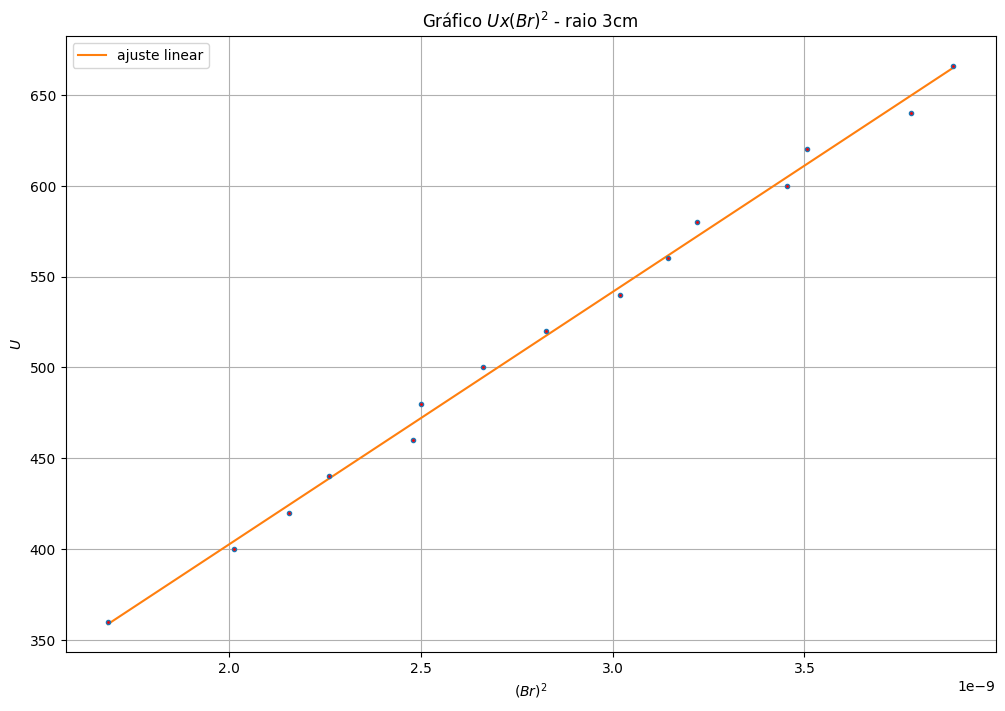

In [33]:
plt.figure(figsize =(12,8))
plt.errorbar(list(df_analis_r3["(Br)*(Br)"])[1:], list(2*df_analis_r3["U"])[1:], list(df_analis_r3["sigma U"])[1:], fmt = ".", markerfacecolor = "red")
plt.grid()
plt.xlabel(r"$(Br)^2$")
plt.ylabel(r"$U$")
plt.title(r"Gráfico $U x (Br)^2$ - raio 3cm")
plt.plot(xs_3,ys_3, label ="ajuste linear" )
plt.legend();

### Raio r=2cm

In [34]:
df_analis_r2 = pd.DataFrame(data_r2, columns=columns)
df_analis_r2


,U,sigma U,(Br)*(Br),sigma (Br)*(Br)
0,148,1,5.302889e-10,9.211201e-07
1,180,1,2.066418e-09,1.818315e-06
2,200,1,2.479474e-09,1.991773e-06
3,210,1,2.584812e-09,2.033642e-06
4,220,1,2.707881e-09,2.081492e-06
5,230,1,2.833812e-09,2.129343e-06
6,240,1,2.946350e-09,2.171212e-06
7,250,1,2.930139e-09,2.165230e-06
8,260,1,3.077648e-09,2.219062e-06
9,270,1,3.228779e-09,2.272894e-06


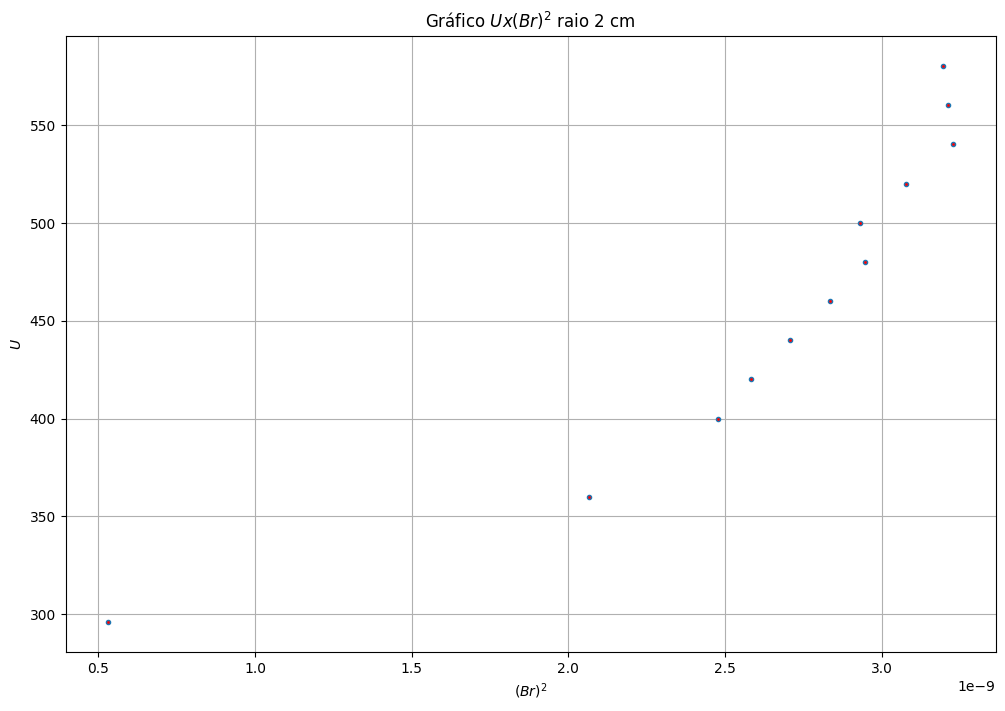

In [35]:
plt.figure(figsize =(12,8))
plt.errorbar(df_analis_r2["(Br)*(Br)"], 2*df_analis_r2["U"], df_analis_r2["sigma U"], fmt = ".", markerfacecolor = "red")
plt.grid()
plt.xlabel(r"$(Br)^2$")
plt.ylabel(r"$U$")
plt.title(r"Gráfico $U x (Br)^2$ raio 2 cm");

In [36]:
# regressão sem intercepto
modelo = sm.OLS(list(2*df_analis_r2["U"])[1:],sm.add_constant(list(df_analis_r2["(Br)*(Br)"]))[1:])
reg = modelo.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     123.7
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           1.47e-06
Time:                        13:28:58   Log-Likelihood:                -46.945
No. Observations:                  11   AIC:                             97.89
Df Residuals:                       9   BIC:                             98.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -50.6197     47.889     -1.057      0.3

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [37]:
c_2 = -50.6197
a_2 = 1.861e+11
xs_2 = np.linspace(list(df_analis_r2["(Br)*(Br)"])[1],list(df_analis_r2["(Br)*(Br)"])[-1])
ys_2 = a_2*xs_2 + c_2

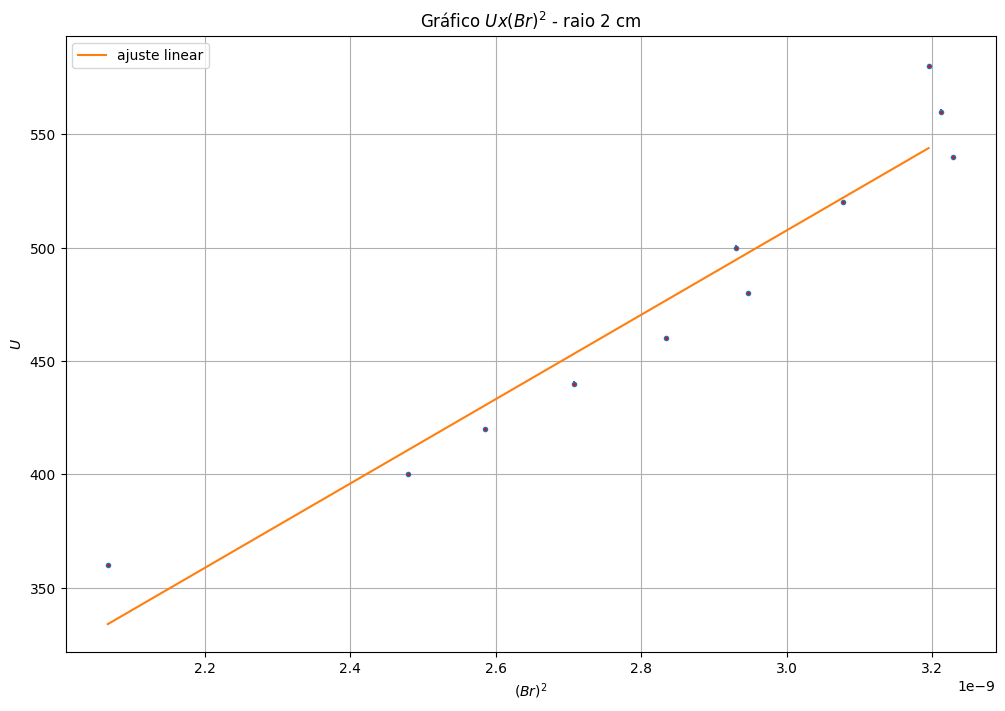

In [38]:
plt.figure(figsize =(12,8))
plt.errorbar(list(df_analis_r2["(Br)*(Br)"])[1:], list(2*df_analis_r2["U"])[1:], list(df_analis_r2["sigma U"])[1:], fmt = ".", markerfacecolor = "red")
plt.grid()
plt.xlabel(r"$(Br)^2$")
plt.ylabel(r"$U$")
plt.title(r"Gráfico $U x (Br)^2$ - raio 2 cm")
plt.plot(xs_2,ys_2, label ="ajuste linear" )
plt.legend();

### Calculos:

Incertezas:


*   $\sigma_{e/m} = \frac{2U}{r^2B^2} \left[ \left( \frac{σ_{U}}{U} \right)^2 + \left( \frac{σ_{B}}{B} \right)^2 \right]^{1/2}$
*   $\sigma_{B} = \left(\frac{4}{5}\right)^{3/2}μ_0n\frac{σ_i}{R}$

Onde R é o raio da bobina e n é o número de voltas